# WeatherPy Homework Challenge

Author: Alex Schanne

This assignment will utilize skills in Python requests, APIs and JSON traversal in order to analyze how weather patterns change as a function of latitude and longitude. More specifically this notebook will accomplish the following: 
<ul>
    <li> Create a series of scatterplots to visualize the relationships between: 
       <ul>
        <li> Tempersature (F) vs. Latitude
        <li> Humidity (%) vs. Latitude
        <li> Cloudiness (%) vs. Latitude
           <li> Wind Speed (mph) vs. Latitude </ul>
    <li> Perform linear regression on each relationship, separating them into Northern Hemisphere and Southern Hemisphere
    <li> Explain what the linear regression is modeling (i.e. highlighting any trends or relationships)

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import requests
import time
from datetime import datetime
from scipy import stats
from scipy.stats import linregress 
import seaborn as sns 
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
#Creating a DataFrame
# Initialize data frame to store data from API calls
weather_check = pd.DataFrame(columns = ["city",
                                      "country", 
                                      "lat",
                                      "lng",
                                      "date", 
                                      "cloudiness", 
                                      "humidity", 
                                      "max_temp", 
                                      "wind_speed"])

weather_check['city'] = cities
weather_check.head()

,city,country,lat,lng,date,cloudiness,humidity,max_temp,wind_speed
0,saint george,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,palauig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ushuaia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,provideniya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rikitea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#acity = cities[0].replace(" ","&") #remove spaces to correctly build URL
        
#print(f'Logging record of {city} | Count: {count}')
#query_url = f"{base_url}&appid={weather_api_key}&units=imperial&q={acity}"
     
#make requests
#weather_request = requests.get(query_url)
#response = weather_request.json()
#print(json.dumps(response, indent =4))

In [7]:
#Calling the Weather API and storing in WeatherPy DataFrame
#tracking the count of calls to the api
count = 1 
error = 0
index = 0
t0 = time.time()

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print(f'Data Retrival from Open Weather API \n.....................')

#looping through each city in our list of generated cities
for city in cities:
    try:
        #acity = cities[index].replace(" ","") #remove spaces to correctly build URL
        
        print(f'Logging record of {city} | Count: {count}')
        query_url = f"{base_url}&appid={weather_api_key}&units=imperial&q={city}"
        
        #make requests
        weather_request = requests.get(query_url)
        response = weather_request.json()
        
        #adding data to dataframe
        #weather_check.iloc[index]["city"] = response["name"]
        weather_check.iloc[index]["cloudiness"] = response["clouds"]["all"]
        weather_check.iloc[index]["country"] = response["sys"]["country"]
        weather_check.iloc[index]["date"] = response["dt"]
        weather_check.iloc[index]["max_temp"] = response["main"]["temp_max"]
        weather_check.iloc[index]["wind_speed"] = response["wind"]["speed"]
        weather_check.iloc[index]["lat"] = response["coord"]["lat"]
        weather_check.iloc[index]["lng"] = response["coord"]["lon"]
        weather_check.iloc[index]["humidity"] = response["main"]["humidity"]

        #updating index and count
        index = index + 1
        count = count + 1 
        
        if count == 51: #to prevent timeouts with the api
            t1 = time.time()
            count = 1
            time.sleep(60-(t1-t0))
            t0 = time.time()
   
    #to skip the cities that we can't find without getting stuck on them
    except Exception as excepts:
        print('City not found-- Skipping')
        error = error + 1
        
    continue

              
print("End of Data Retrieval API.")
print("Could not get data for " + str({error}) + " cities.")

Data Retrival from Open Weather API 
.....................
Logging record of saint george | Count: 1
Logging record of palauig | Count: 2
Logging record of ushuaia | Count: 3
Logging record of provideniya | Count: 4
Logging record of rikitea | Count: 5
Logging record of dikson | Count: 6
Logging record of santa rosa | Count: 7
Logging record of belushya guba | Count: 8
City not found-- Skipping
Logging record of khatanga | Count: 8
Logging record of gavle | Count: 9
Logging record of coquimbo | Count: 10
Logging record of lebu | Count: 11
Logging record of shepsi | Count: 12
Logging record of mahebourg | Count: 13
Logging record of bredasdorp | Count: 14
Logging record of victoria | Count: 15
Logging record of sidi ali | Count: 16
Logging record of ribeira grande | Count: 17
Logging record of caravelas | Count: 18
Logging record of kalmunai | Count: 19
Logging record of chuy | Count: 20
Logging record of beloha | Count: 21
Logging record of taolanaro | Count: 22
City not found-- Skippi

Logging record of paamiut | Count: 32
Logging record of morogoro | Count: 33
Logging record of svebolle | Count: 34
Logging record of ilulissat | Count: 35
Logging record of torbay | Count: 36
Logging record of bandarbeyla | Count: 37
Logging record of mandalgovi | Count: 38
Logging record of asau | Count: 39
Logging record of kaduy | Count: 40
Logging record of grand river south east | Count: 41
City not found-- Skipping
Logging record of vostok | Count: 41
Logging record of labuhan | Count: 42
Logging record of halifax | Count: 43
Logging record of porto novo | Count: 44
Logging record of ntoum | Count: 45
Logging record of geraldton | Count: 46
Logging record of alta floresta | Count: 47
Logging record of codrington | Count: 48
Logging record of gaoyou | Count: 49
Logging record of tsihombe | Count: 50
City not found-- Skipping
Logging record of saleaula | Count: 50
City not found-- Skipping
Logging record of nador | Count: 50
Logging record of longyearbyen | Count: 1
Logging record

Logging record of sainte-agathe-des-monts | Count: 6
Logging record of mikkeli | Count: 7
Logging record of bontang | Count: 8
Logging record of blue springs | Count: 9
Logging record of hobyo | Count: 10
Logging record of necochea | Count: 11
Logging record of ahipara | Count: 12
Logging record of torrevieja | Count: 13
Logging record of sataua | Count: 14
City not found-- Skipping
Logging record of jabiru | Count: 14
City not found-- Skipping
Logging record of san quintin | Count: 14
Logging record of miri | Count: 15
Logging record of xadani | Count: 16
City not found-- Skipping
Logging record of kathmandu | Count: 16
Logging record of lagoa | Count: 17
Logging record of lokoja | Count: 18
Logging record of porto nacional | Count: 19
Logging record of blagoyevo | Count: 20
Logging record of warqla | Count: 21
City not found-- Skipping
Logging record of sao filipe | Count: 21
Logging record of heishan | Count: 22
Logging record of sibolga | Count: 23
Logging record of vila | Count: 2

Logging record of grand island | Count: 45
Logging record of port hawkesbury | Count: 46
Logging record of zaros | Count: 47
Logging record of salinas | Count: 48
Logging record of muhos | Count: 49
Logging record of ruatoria | Count: 50
City not found-- Skipping
Logging record of dubenskiy | Count: 50
City not found-- Skipping
Logging record of kalangala | Count: 50
Logging record of broome | Count: 1
Logging record of cayenne | Count: 2
Logging record of westport | Count: 3
Logging record of shinjo | Count: 4
End of Data Retrieval API.
Could not get data for {54} cities.


In [8]:
print(len(weather_check))
print(weather_check.head())

608
           city country    lat     lng        date cloudiness humidity  \
0  saint george      US   37.1 -113.58  1595889115          1       13   
1       palauig      PH  15.44   119.9  1595889115         93       72   
2       ushuaia      AR  -54.8   -68.3  1595889026         75       80   
3   provideniya      RU  64.38  -173.3  1595889115         90       93   
4       rikitea      PF -23.12 -134.97  1595889115         78       75   

  max_temp wind_speed  
0    102.2      13.87  
1    83.37       2.55  
2     33.8      21.92  
3     51.8       4.47  
4    72.25      11.12  


In [9]:
#Count data to ensure at least 500 cities
weather_check.count()

city          608
country       554
lat           554
lng           554
date          554
cloudiness    554
humidity      554
max_temp      554
wind_speed    554
dtype: int64

In [19]:
# Inspect the data and remove the cities where the humidity > 100%.
weather_data = weather_check[weather_check["humidity"] <= 100]
weather_data

,city,country,lat,lng,date,cloudiness,humidity,max_temp,wind_speed
0,saint george,US,37.1,-113.58,1595889115,1,13,102.2,13.87
1,palauig,PH,15.44,119.9,1595889115,93,72,83.37,2.55
2,ushuaia,AR,-54.8,-68.3,1595889026,75,80,33.8,21.92
3,provideniya,RU,64.38,-173.3,1595889115,90,93,51.8,4.47
4,rikitea,PF,-23.12,-134.97,1595889115,78,75,72.25,11.12
...,...,...,...,...,...,...,...,...,...
549,ballina,UG,-0.31,32.23,1595889719,20,88,71.6,5.82
550,kangaatsiaq,US,42.25,-75.83,1595889775,75,48,91.99,5.82
551,saint-augustin,GF,4.93,-52.33,1595889775,38,88,78.8,2.24
552,tutoia,US,41.14,-73.36,1595889723,1,52,93,11.41


In [121]:
# Extract relevant fields from the data frame
relevant_weather = pd.DataFrame(weather_data[['city',
                                              'country',
                                              'lat',
                                              'lng',
                                              'cloudiness',
                                              'humidity',
                                              'max_temp',
                                              'wind_speed']])
relevant_weather.head()

# Export the City_Data into a csv
relevant_weather.to_csv("weather_data.csv", index=False, header=True)

## Latitude vs. Temperature Plotting

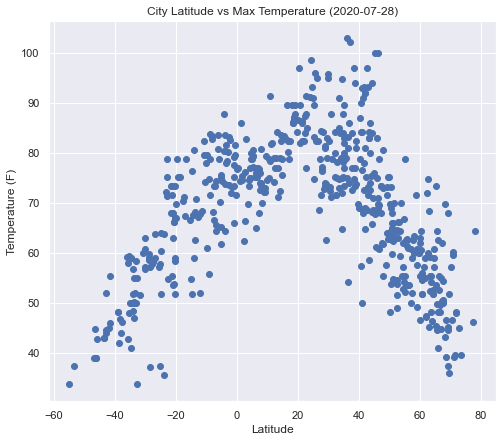

In [108]:
#creating a scatterplot of latitude versus temperature from the weather data
plt.figure(figsize = (8,7))
sns.set()
x_values = weather_data['lat']
y_values = weather_data['max_temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')

#saving and showing plot
plt.savefig("output/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plotting

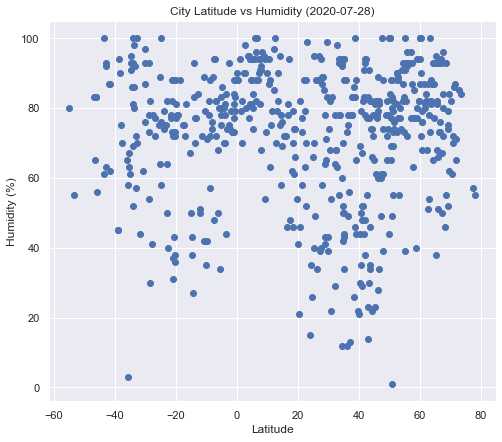

In [109]:
#creating a scatterplot of latitude versus humidity from the weather data
plt.figure(figsize = (8,7))
sns.set()
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')

#saving and showing plot
plt.savefig("output/humid_vs_temp.png")
plt.show()

## Latitude vs. Cloudiness Plotting

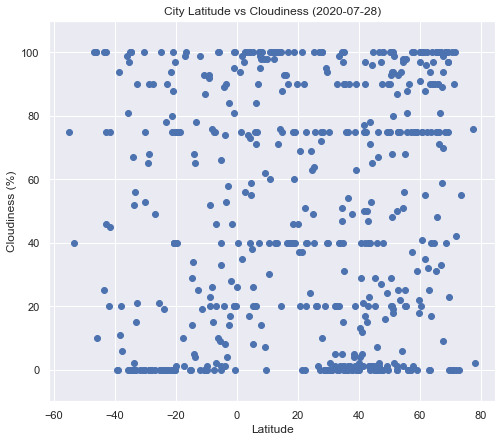

In [110]:
#creating a scatterplot of latitude versus cloudiness from the weather data
plt.figure(figsize = (8,7))
sns.set()
x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.ylim(-10,(weather_data["cloudiness"].max()+10))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')

#saving and showing plot
plt.savefig("output/cloud_vs_temp.png")
plt.show()

## Latitude vs. Wind Speed Plotting

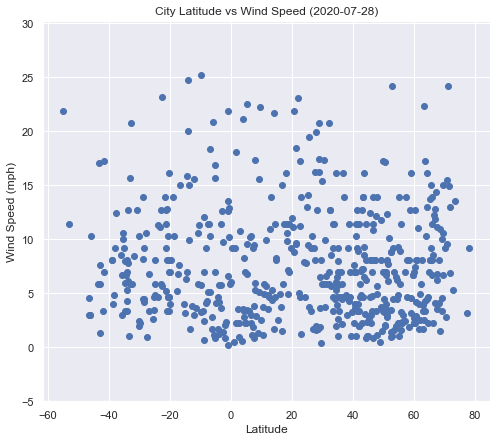

In [111]:
#creating a scatterplot of latitude versus wind speed from the weather data
plt.figure(figsize = (8,7))
sns.set()
x_values = weather_data['lat']
y_values = weather_data['wind_speed']
plt.scatter(x_values,y_values)
plt.ylim(-5,(weather_data["wind_speed"].max()+5))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')

#saving and showing plot
plt.savefig("output/wind_vs_temp.png")
plt.show()

## Linear Regression

In [76]:
#Creating DataFrames for Northern and Southern Hemispheres
north_weather = weather_data[weather_data["lat"] >= 0]
south_weather = weather_data[weather_data["lat"] < 0]

#north_weather.head()
south_weather.head()

,city,country,lat,lng,date,cloudiness,humidity,max_temp,wind_speed
2,ushuaia,AR,-54.8,-68.3,1595889026,75,80,33.8,21.92
4,rikitea,PF,-23.12,-134.97,1595889115,78,75,72.25,11.12
9,gavle,CL,-29.95,-71.34,1595889116,0,76,57.2,10.29
10,coquimbo,CL,-37.62,-73.65,1595889116,6,70,46.22,12.41
12,shepsi,MU,-20.41,57.7,1595889116,40,88,66.2,4.7


In [112]:
#creating a function for linear regression plotting
def linreg(x_vals,y_vals,x_label,y_label,label_position,figure):
    #getting regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals.astype(float), y_vals.astype(float))
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #formatting the plot
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,regress_values,"r-")
    plt.annotate(line_eq,label_position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #printing R
    print(f"The r-squared is: {rvalue**2}")
    
    #save and show figure
    plt.savefig(f"output/{figure}.png")
    plt.show()

The r-squared is: 0.44695547379601147


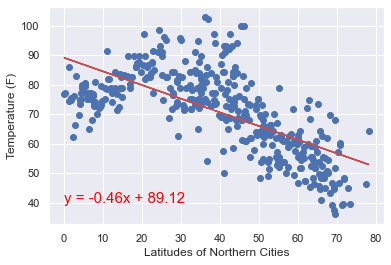

In [113]:
#creating the plot for Northern Cities: Max Temp vs. Latitude Linear Regression
x_vals = north_weather['lat']
y_vals = north_weather['max_temp']
x_label = "Latitudes of Northern Cities"
y_label = "Temperature (F)"
label_position = (0,40)
figure = "north_temp_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 0.6747033264935015


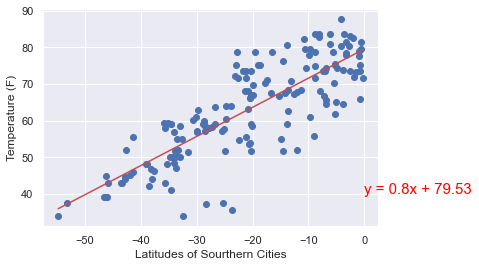

In [114]:
#creating the plot for Southern Cities: Max Temp vs. Latitude Linear Regression
x_vals = south_weather['lat']
y_vals = south_weather['max_temp']
x_label = "Latitudes of Sourthern Cities"
y_label = "Temperature (F)"
label_position = (0,40)
figure = "south_temp_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 0.0007249166295809284


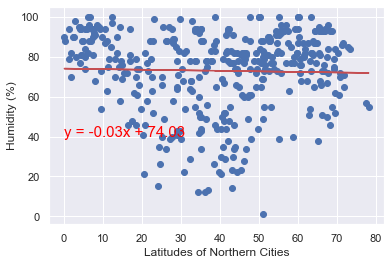

In [115]:
#creating the plot for Northern Cities: Humidity vs. Latitude Linear Regression
x_vals = north_weather['lat']
y_vals = north_weather['humidity']
x_label = "Latitudes of Northern Cities"
y_label = "Humidity (%)"
label_position = (0,40)
figure = "north_humid_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 0.00011137449010697495


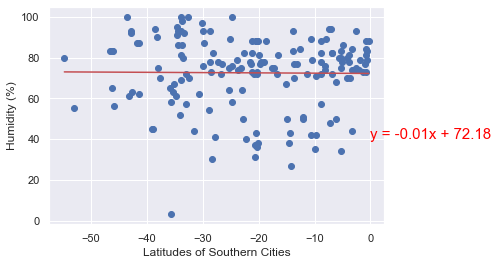

In [116]:
#creating the plot for Southern Cities: Humidity vs. Latitude Linear Regression
x_vals = south_weather['lat']
y_vals = south_weather['humidity']
x_label = "Latitudes of Southern Cities"
y_label = "Humidity (%)"
label_position = (0,40)
figure = "south_humid_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 0.00015232636998525616


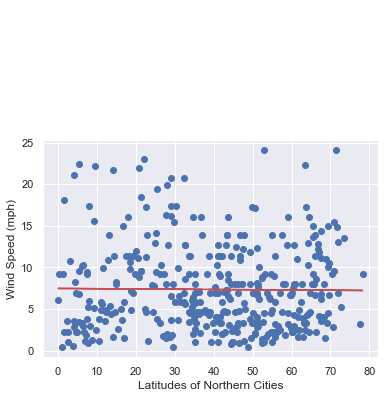

In [117]:
#creating the plot for Northern Cities: Wind Speed vs. Latitude Linear Regression
x_vals = north_weather['lat']
y_vals = north_weather['wind_speed']
x_label = "Latitudes of Northern Cities"
y_label = "Wind Speed (mph)"
label_position = (0,40)
figure = "north_wind_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 3.7151223615262577e-06


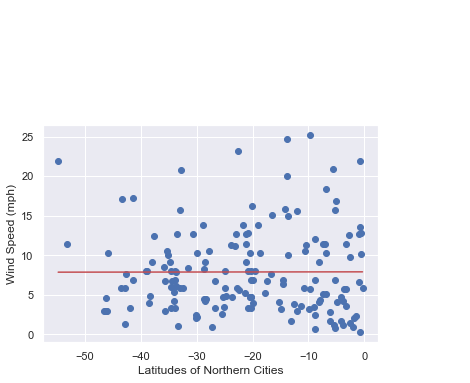

In [118]:
#creating the plot for Southern Cities: Wind Speed vs. Latitude Linear Regression
x_vals = south_weather['lat']
y_vals = south_weather['wind_speed']
x_label = "Latitudes of Northern Cities"
y_label = "Wind Speed (mph)"
label_position = (0,40)
figure = "south_wind_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 0.00011307799322207813


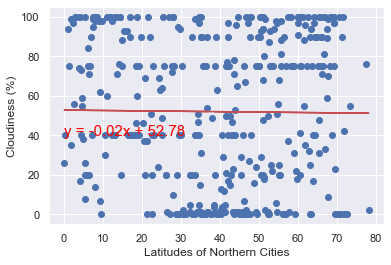

In [119]:
#creating the plot for Northern Cities: Cloudiness vs. Latitude Linear Regression
x_vals = north_weather['lat']
y_vals = north_weather['cloudiness']
x_label = "Latitudes of Northern Cities"
y_label = "Cloudiness (%)"
label_position = (0,40)
figure = "north_cloud_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

The r-squared is: 0.002872254301583056


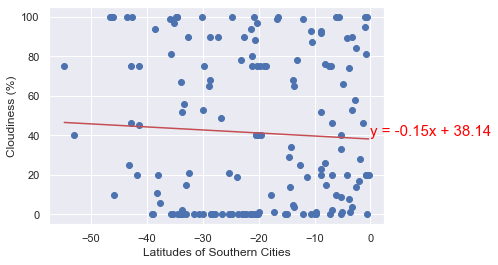

In [120]:
#creating the plot for Southern Cities: Cloudiness vs. Latitude Linear Regression
x_vals = south_weather['lat']
y_vals = south_weather['cloudiness']
x_label = "Latitudes of Southern Cities"
y_label = "Cloudiness (%)"
label_position = (0,40)
figure = "south_cloud_vs_lat"

linreg(x_vals,y_vals,x_label,y_label,label_position,figure)

## Trends and Observations

First thing we can notice, which is not surprising, is that the scatterplots for the Northern and Southern hemsipheres, regards latitude and maximum temperatures show opposite relationships. The South shows a positive relationship between latitude and temperature, as in the closer to the equator, the higher the temperature, and vice versa for the Northern hemisphere. What was less expected was the bump in temperatures around 30 degrees North latitude. It would be interesting to explore that affect more, especially as it is seemingly not mirrored in the southern hemisphere.

Second thing we see is that there appears to be no relationship between latitude and humidity. I had expected to find a similar relationship between humidity and latitude as we saw with temperature and latitude. I also had expected to see more humidity in the southern hemisphere, but superficially it looks like the data is skewed higher in the northern hemisphere. but the numbers are not significantly different between the north and south data. It could just be the function of having more data from the northern hemisphere, but again, I believe it would be interesting look at more conclusive data to determine the humidity levels in the north and south. 

The third thing we observe is the unique pattern that the cloudiness data produces. There appears to be clusters of 0% and 100% cloudiness in the northern and southern hemisphere. The Northern hemisphere appears to have two clusters of 100% cloud cover near the equator and near the pole as well as one cluster of 0% cloud cover near the median, which is mirrored in the southern hemisphere. Without knowing too much about cloud movement and weather patterns, I would be interested to know if this a normal trend and just a normal function of how weather moves globally. Also please note that by saying there appears to be clusters, this is mere casual observation and no cluster analysis was performed to make any truly conclusive statements. 